In [4]:
import numpy as np
import matplotlib, matplotlib.pylab as plt
%matplotlib inline
import csv, collections
import pandas as pd
import sklearn, sklearn.model_selection, sklearn.tree

In [1]:
!wget -c -q https://raw.githubusercontent.com/ieee8023/NeuralNetwork-Examples/master/general/Modified_KTx_75_patients_April_17_2019.csv
    

--2019-04-26 16:19:56--  https://raw.githubusercontent.com/ieee8023/NeuralNetwork-Examples/master/general/Modified_KTx_75_patients_April_17_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [27]:
data = pd.read_csv("Modified_KTx_75_patients_April_17_2019.csv", index_col="P#")

In [6]:
# filter missing data
# drop columns that don't have more than 70 real values 
data = data.dropna(1,thresh=70)
# drop all rows which have any NaNs
data = data.dropna()

In [7]:
# convert categorical columns to ids
for col in data:
    if data[col].dtype == "object":
        print (col)
        data = data.join(pd.get_dummies(data[col], prefix=col))
        del data[col]

SEX
Last NGFR Feb 2019
CMV_STATUS
K_PUMPED
Induction
Diagnosis


In [8]:
features = [col for col in data.columns if "Outcome" not in col]
targets = [col for col in data.columns if "Outcome" in col]

In [18]:
# to just select a subset of features
features = [feat for feat in features if feat.startswith("CD4")]

In [19]:
# features considered
features

['CD4+CD25hiFoxP3+ abs',
 'CD4+CD25hiFoxP3+ perc',
 'CD4+CD25neg abs',
 'CD4+CD25neg perc',
 'CD4+CD25hiCD127- abs',
 'CD4+CD25hiCD127- perc',
 'CD4+CD25hiCD127-b0.83',
 'CD4+CD120b+CD127- abs',
 'CD4+CD120b+CD127- perc',
 'CD4+IL17+ abs',
 'CD4+IL17+ perc',
 'CD4+CD127- abs',
 'CD4+CD127- perc',
 'CD4+CD25+ abs',
 'CD4+CD25+ perc',
 'CD4+FoxP3- perc',
 'CD4+FoxP3+ perc',
 'CD4+CD25hi abs',
 'CD4+CD25hi perc',
 'CD4+CD25lo abs',
 'CD4+CD25lo perc',
 'CD4+ (%) -2',
 'CD4+abs106 -2',
 'CD4+CD127-loTNFR2+%',
 'CD4+CD127-loTNFR2+abs106',
 'CD4+CD25+hiCD127-lo%',
 'CD4+CD25+hiCD127-loabs',
 'CD4+CD127lo/- 1',
 'CD4+CD127lo/-abs106 1',
 'CD4+CD127+ 1',
 'CD4+CD127lo/- 2',
 'CD4+CD127+ 2',
 'CD4+CD127lo/-TNFR2+ to CD4+CD25- ratio',
 'CD4+CD127lo/-TNFR2+ to CD4+FoxP3- ratio',
 'CD4+CD127lo/-TNFR2+ to CD4+CD127+ ratio',
 'CD4+IL17+ to CD4+CD127lo/-TNFR2+ ratio',
 'CD4+CD127lo/-TNFR2+ to CD4+IL17+ratio',
 'CD4 to CD4+CD127lo/-TNFR2+']

In [20]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data[features], 
                                                                            data[targets]["Outcome 1"],
                                                                            stratify=data[targets]["Outcome 1"],
                                                                            test_size=0.3, 
                                                                            random_state=0)


In [21]:
print("Distribution in training data:", collections.Counter(y_train))
print("Distribution in test data:", collections.Counter(y_test))

Distribution in training data: Counter({1: 22, 0: 10})
Distribution in test data: Counter({1: 11, 0: 4})


In [22]:
model = sklearn.tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=0, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [23]:
# how accurate
print ("AUC on train set: ",sklearn.metrics.roc_auc_score(y_train, model.predict(X_train)))
print ("AUC on test set: ",sklearn.metrics.roc_auc_score(y_test, model.predict(X_test)))

AUC on train set:  0.8590909090909091
AUC on test set:  0.8181818181818181


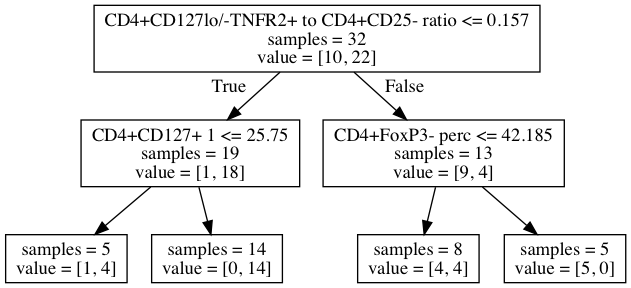

In [24]:
dotfile = open('tree.dot', 'w')
sklearn.tree.export_graphviz(model, out_file = dotfile, feature_names = X_train.columns, impurity=False)
dotfile.close()

from graphviz import Source
src = Source(open('tree.dot', 'r').read(),format='png')
src.render("tree")

from PIL import Image                                                                
Image.open('tree.png')